In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
from pprint import pprint

In [3]:
# Read the CSV & Create the DataFrame

cities_df = pd.read_csv("Resources/AQ_and_health.csv")
cities_df

,State,City,FIPS,Pop 2010,Cancer %,Asthma %,Heart Disease %,Pulminary Disease %,Mental Illness %,Poor Health %,...,Pop_Metro_2015,CO2 1975,CO2 1990,CO2 2000,CO2 2012,PM2.5 2000,PM2.5 2005,PM 2.5 2010,PM2.5 2014,Heat Wave Index
0,NM,Albuquerque,3502000,545852,5.8,10.4,5.6,5.5,12.6,12.9,...,6.859337e+05,4.360884e+06,3.720008e+06,3.800904e+06,3.259878e+06,8.652916,8.211202,6.974018,6.863455,10.980800
1,AK,Anchorage,203000,291826,5.1,9.3,4.5,5.0,11.4,10.6,...,1.230898e+05,3.779778e+05,3.344264e+05,3.823933e+05,3.491618e+05,5.862218,5.384438,4.634226,8.126340,9.129660
2,GA,Atlanta,1304000,420003,4.8,9.0,5.0,5.7,12.2,11.1,...,1.516952e+06,1.272662e+07,1.229068e+07,1.459993e+07,1.250880e+07,19.794460,13.311600,10.708480,10.280250,18.743500
3,TX,Austin,4805000,790390,4.3,8.3,3.9,4.0,11.4,9.4,...,1.063621e+06,4.417963e+06,4.107195e+06,5.003950e+06,4.174131e+06,15.143920,10.114128,8.038374,8.593885,15.354700
4,CA,Bakersfield,603526,347483,5.0,9.5,5.4,6.1,14.0,13.1,...,5.333185e+05,3.324191e+06,3.342471e+06,3.438174e+06,2.668842e+06,16.668700,14.384460,12.763120,15.111900,4.478770
5,MD,Baltimore,2404000,620961,5.5,12.3,6.4,7.2,13.9,12.3,...,1.360858e+06,1.527262e+07,1.315547e+07,1.159241e+07,9.739341e+06,19.015320,15.003140,11.726380,11.436350,6.844810
6,LA,Baton Rouge,2205000,229493,5.2,9.4,6.4,6.8,14.0,12.8,...,2.707588e+05,7.692180e+06,1.103920e+07,1.023925e+07,5.451821e+06,18.208440,13.259040,10.246752,10.631650,23.919600
7,AL,Birmingham,107000,212237,5.6,10.5,7.5,8.8,15.2,16.3,...,1.963878e+05,2.202561e+06,1.989847e+06,1.714411e+06,1.858032e+06,19.382540,13.886800,10.625714,10.326900,20.218000
8,MA,Boston,2507000,617594,4.5,11.4,4.6,5.1,13.9,10.5,...,2.063274e+06,2.463764e+07,2.211668e+07,2.317636e+07,2.185804e+07,12.765180,10.733900,8.771842,9.085375,4.048450
9,NY,Buffalo,3611000,261310,5.8,12.7,7.1,8.5,15.5,15.8,...,6.158359e+05,9.772111e+06,9.625372e+06,9.312949e+06,5.282789e+06,14.982100,12.289240,9.591696,10.302950,10.840900


In [10]:
# Convert Avg Temps to F & add new series to the DataFrame

temp_change_1990_to_2014_F = (cities_df['Avg Temp 2014'] * 9/5 + 32) - (cities_df['Avg Temp 1990'] * 9/5 +32)

cities_df['Avg Temp Change (F)'] = temp_change_1990_to_2014_F

cities_df.head()


,State,City,FIPS,Pop 2010,Cancer %,Asthma %,Heart Disease %,Pulminary Disease %,Mental Illness %,Poor Health %,...,CO2 2000,CO2 2012,PM2.5 2000,PM2.5 2005,PM 2.5 2010,PM2.5 2014,Heat Wave Index,Temp Change Deg F,Avg Temp Change in Deg F,Avg Temp Change (F)
0,NM,Albuquerque,3502000,545852,5.8,10.4,5.6,5.5,12.6,12.9,...,3.800904e+06,3.259878e+06,8.652916,8.211202,6.974018,6.863455,10.98080,1.902523,1.902523,1.902523
1,AK,Anchorage,203000,291826,5.1,9.3,4.5,5.0,11.4,10.6,...,3.823933e+05,3.491618e+05,5.862218,5.384438,4.634226,8.126340,9.12966,1.646370,1.646370,1.646370
2,GA,Atlanta,1304000,420003,4.8,9.0,5.0,5.7,12.2,11.1,...,1.459993e+07,1.250880e+07,19.794460,13.311600,10.708480,10.280250,18.74350,0.143739,0.143739,0.143739
3,TX,Austin,4805000,790390,4.3,8.3,3.9,4.0,11.4,9.4,...,5.003950e+06,4.174131e+06,15.143920,10.114128,8.038374,8.593885,15.35470,1.261359,1.261359,1.261359
4,CA,Bakersfield,603526,347483,5.0,9.5,5.4,6.1,14.0,13.1,...,3.438174e+06,2.668842e+06,16.668700,14.384460,12.763120,15.111900,4.47877,2.037710,2.037710,2.037710


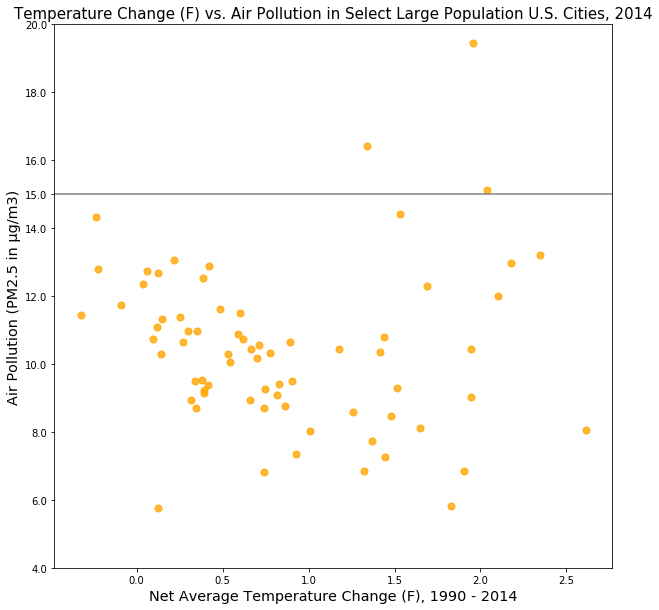

In [34]:
# Create Temp Change vs. Pollution Visualizations
# =============================

# Change the Figure Size
fig, ax = plt.subplots(figsize=(10,10))

# Create Variables for the Series
avg_temp_change = cities_df["Avg Temp Change (F)"]
pollution = cities_df["PM2.5 2014"]


# Create the x & y labels
ax.set_xlabel("Net Average Temperature Change (F), 1990 - 2014", size= "x-large")
ax.set_ylabel("Air Pollution (PM2.5 in μg/m3)", size= "x-large")

# Create the Title
ax.set_title("Temperature Change (F) vs. Air Pollution in Select Large Population U.S. Cities, 2014", size= 15)

# Create EPA NAAQS H-Line
ax.axhline(y=15, color= 'gray')

# Plot the Series
ax.scatter(avg_temp_change, pollution, color= "orange", marker="o", s= 50, alpha=.80)

# Set x limits
ax.set_ylim(4,20)


# Set y ticks
yt = ax.get_yticks() 
yt= np.append(yt,15)

ytl= yt.tolist()
ytl[-1]="15.0"
ax.set_yticks(yt)
ax.set_yticklabels(ytl)

# Show Figure
plt.show()

# Save Figure
fig.savefig("Visualizations/Avg. Temp Change (F) 2014 vs. Pollution 2014.png")

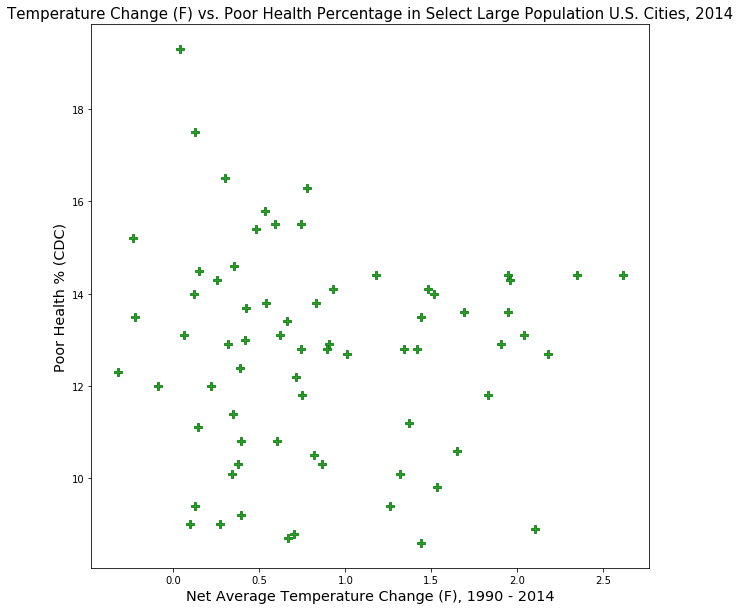

In [35]:
# Create Temp Change vs. Poor Health Visualizations
# =============================

# Change the Figure Size
fig, ax = plt.subplots(figsize=(10,10))

# Create Variables for the Series
avg_temp_change = cities_df["Avg Temp Change (F)"]
poor_health = cities_df["Poor Health %"]


# Create the x & y labels
ax.set_xlabel("Net Average Temperature Change (F), 1990 - 2014", size= "x-large")
ax.set_ylabel("Poor Health % (CDC)", size= "x-large")

# Create the Title
ax.set_title("Temperature Change (F) vs. Poor Health Percentage in Select Large Population U.S. Cities, 2014", size= 15)


# Plot the Series
ax.scatter(avg_temp_change, poor_health, color= "green", marker="P", s= 50, alpha=.80)

# Set x limits
#ax.set_ylim()


# Set y ticks
#yt = ax.get_yticks() 
#yt= np.append(yt,15)

# ytl= yt.tolist()
# ytl[-1]="15.0"
# ax.set_yticks(yt)
# ax.set_yticklabels(ytl)

# Show Figure
plt.show()

# Save Figure
fig.savefig("Visualizations/Avg. Temp Change (F) 2014 vs. Poor Health.png")

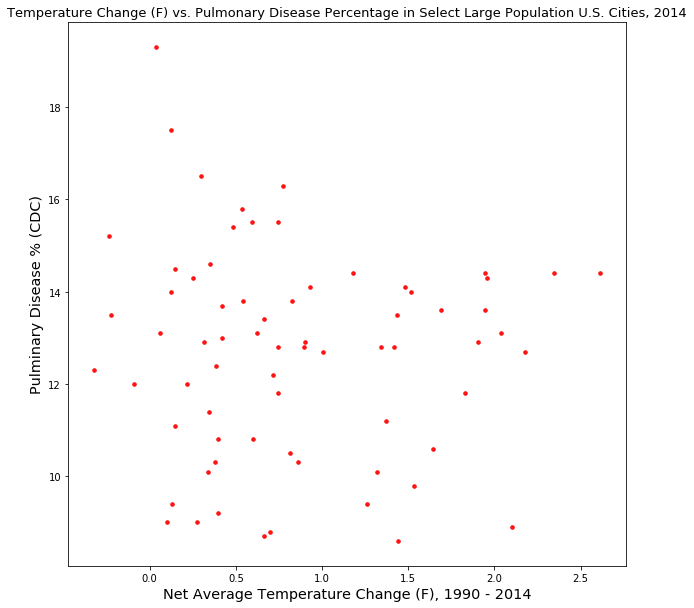

In [40]:
# Create Temp Change vs. Pulminary Disease % Visualization
# =============================

# Change the Figure Size
fig, ax = plt.subplots(figsize=(10,10))

# Create Variables for the Series
avg_temp_change = cities_df["Avg Temp Change (F)"]
pd_pct = cities_df["Pulminary Disease %"]


# Create the x & y labels
ax.set_xlabel("Net Average Temperature Change (F), 1990 - 2014", size= "x-large")
ax.set_ylabel("Pulminary Disease % (CDC)", size= "x-large")

# Create the Title
ax.set_title("Temperature Change (F) vs. Pulmonary Disease Percentage in Select Large Population U.S. Cities, 2014", size= 13)


# Plot the Series
ax.scatter(avg_temp_change, poor_health, color= "red", marker=".", s= 50, alpha=.90)

# Set x limits
#ax.set_ylim()


# Set y ticks
#yt = ax.get_yticks() 
#yt= np.append(yt,15)

# ytl= yt.tolist()
# ytl[-1]="15.0"
# ax.set_yticks(yt)
# ax.set_yticklabels(ytl)

# Show Figure
plt.show()

# Save Figure
fig.savefig("Visualizations/Avg. Temp Change (F) 2014 vs. Pulmonary Disease.png")